### Import essential packages

In [2]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import plotly.offline as py
import seaborn as sns # visualization
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import PIL
from PIL import Image
import random
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Set work directiory

In [3]:
new_dir = Path("/Users/niko/Desktop/Statistics and Data Science/10 Big Data Platforms(Advanced Analytics in Business)/Assignment2")
os.chdir(new_dir)

### Read Json file, which contains the information of the structure of the image datasets

In [4]:
data_game = pd.read_json("dataset.json")

In [5]:
data_game.head(5)

,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots
0,2805630,2024-02-24,BotMobile,1173,Positive,10.0,100.0,"[Action, Action-Adventure, Adventure, Casual, ...",[2805630_ss_02b69bffacf19807fb6202fb8167fad7e0...
1,2805610,2024-02-24,Just skill shooter 3: 2d edition,199,Positive,11.0,90.0,"[2D, Action, Action RPG, Action-Adventure, Adv...",[2805610_ss_21f5dfd4d369f1cefdd9d233f574a4758d...
2,2816420,2024-02-24,Slime Drop,199,None,NaN,NaN,"[2D, Arcade, Casual, Clicker, Colorful, Cute, ...",[2816420_ss_649a6c5bb66b93bf7b0a384d412923618d...
3,2815670,2024-02-24,Path to the Creator,299,None,NaN,NaN,"[2D, Action RPG, Adventure, Character Customiz...",[2815670_ss_06c8a39fd0618390bdedaff037f2463ca4...
4,2776190,2024-02-24,Crowd Control VR,1179,None,NaN,NaN,"[360 Video, Arcade, Cartoony, Casual, Fantasy,...",[2776190_ss_01d6152f8e559e051312ea5e6232ba1ecb...


### General inforamtion of data_game
There are 14687 logs of game but only 6904 with sentiment and reviews, which means there more than half rows data in the datasets is incomplete. But luckily, the missing values is not totally randomly missed, the missing values(sentiment reviews percentage) always occur at the same row of a game.

In [6]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14687 entries, 0 to 14686
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appid        14687 non-null  object 
 1   release      14687 non-null  object 
 2   title        14687 non-null  object 
 3   price        14687 non-null  int64  
 4   sentiment    6904 non-null   object 
 5   reviews      6904 non-null   float64
 6   percentage   6904 non-null   float64
 7   tags         14687 non-null  object 
 8   screenshots  14687 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.0+ MB


### Set the directory of the image stored folder

In [7]:
file_path = Path("/Users/niko/Desktop/Statistics and Data Science/10 Big Data Platforms(Advanced Analytics in Business)/Assignment2/images")

### Simple exploration of the 'price' data in the dataset.
- The mean price is 1241.07, but the high standard deviation (9214.54) indicates a large spread in the data.
- The price ranges from 0 to 512,850, showing extreme values.
- The median price is 499, suggesting that half of the prices are below this value and half are above.
- The interquartile range (between the 25th and 75th percentiles) is from 199 to 998, indicating significant variation even within the middle 50% of the data.


In [9]:
print(data_game['price'].describe())

count     14687.000000
mean       1241.069585
std        9214.536905
min           0.000000
25%         199.000000
50%         499.000000
75%         998.000000
max      512850.000000
Name: price, dtype: float64


### <span style="color:red">Don't Use this methods to split the dataset!</span>
This method is relatively cumbersome. For preliminary exploration, it is recommended to use the second method below. This is just recorded here for reference.

**screenshots name is stored as follow:**
[2805630_ss_02b69bffacf19807fb6202fb8167fad7e08eae77.1920x1080.jpg, 2805630_ss_67edf620e44492c0110912c2a6672113011aa94c.1920x1080.jpg, 2805630_ss_790259f92a9ba5f506a00eafc9efa4fb2dc9686d.1920x1080.jpg, 2805630_ss_a25f2dcb34e2688eaa6c9a971c38a03dbdab18fb.1920x1080.jpg, 2805630_ss_b8fb2eff1ddc2816f0ec744d467ab3dfe9d584e1.1920x1080.jpg, 2805630_ss_c1a17e1b1ca267e911de2948f426b34b07cca172.1920x1080.jpg, 2805630_ss_c96c5067160ab0a5eeb71142478872313ee4d234.1920x1080.jpg, 2805630_ss_fc7976bb6906578e962c52d4952a5b4184351d1c.1920x1080.jpg]

In [73]:
data_game['num_screenshots'] = data_game['screenshots'].apply(len)
data_game['test_size'] = (data_game['num_screenshots'] * 0.2).astype(int)
data_game['train_size'] = (data_game['num_screenshots'] - data_game['test_size'].astype(int)).astype(int)
print(data_game)

         appid     release                             title  price sentiment  \
0      2805630  2024-02-24                         BotMobile   1173  Positive   
1      2805610  2024-02-24  Just skill shooter 3: 2d edition    199  Positive   
2      2816420  2024-02-24                        Slime Drop    199      None   
3      2815670  2024-02-24               Path to the Creator    299      None   
4      2776190  2024-02-24                  Crowd Control VR   1179      None   
...        ...         ...                               ...    ...       ...   
14682  2180890  2024-03-11                        Bunny Game    498      None   
14683  2782420  2024-03-11                    Minimal Escape    589      None   
14684  2836310  2024-03-11                           Refrega    779      None   
14685  2626240  2024-03-11                Saving Mrs. Hinako   1479      None   
14686  2839310  2024-03-11                            Evader     99      None   

       reviews  percentage 

In [74]:
print(data_game[data_game['test_size'] == 0])

         appid     release                                   title  price  \
519    2613510  2024-02-14                                  Tether    499   
2089   1316530  2024-01-23                             Buster's TD    819   
2530   2384890  2024-01-09                           Get Out Joey!    589   
2738   2596330  2024-01-04   Micro Machines: Mini Challenge Mayhem   1479   
3053   2027040  2023-12-21                                     WOE    399   
3676   2591840  2023-12-06  Shadows of Rogue: The Sorcerer's Curse     99   
3816   2193370  2023-12-02                     Creative Continents   1950   
4577   2638830  2023-11-12                       Rugby League Riot    399   
4667   2238360  2023-11-09                        You Have No Time    498   
4775   1915560  2023-11-07            Spread Out! Hold Naar' Havok     99   
5189   2607990  2023-10-27    Choice Clash: What Would You Rather?    199   
6647   2540310  2023-09-20                                  Listen    299   

In [75]:
data_game_dropped = data_game[data_game['test_size']>=1]
print(data_game_dropped.shape) # from 14686 decreased to 14650

(14650, 12)


In [76]:
# Create empty dictionaries to store 'appid' and photo names
train_data = {'appid': [], 'train_images': []}
test_data = {'appid': [], 'test_images': []}

for _, row in data_game_dropped.iterrows():
    screenshots = row['screenshots']
    train_size = row['train_size']
    test_size = row['test_size']
    appid = row['appid']
    
    # If the screenshots list is empty, print a message and skip the current row
    if not screenshots:
        print(f"No screenshots available for game with appid {appid}")
        continue
    
    # Randomly select test_size number of photos from the screenshots list as the test set
    test_selected = random.sample(screenshots, test_size)
    
    # Map 'appid' with the photos in the test set
    test_data['appid'].extend([appid] * len(test_selected))
    test_data['test_images'].extend(test_selected)
    
    # Put the remaining photos into the training set
    train_remaining = [img for img in screenshots if img not in test_selected]
    
    # Map 'appid' with the photos in the training set
    train_data['appid'].extend([appid] * len(train_remaining))
    train_data['train_images'].extend(train_remaining)

# Convert the dictionaries to DataFrames
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
print(train_df)

          appid  \
0       2805630   
1       2805630   
2       2805630   
3       2805630   
4       2805630   
...         ...   
106896  2839310   
106897  2839310   
106898  2839310   
106899  2839310   
106900  2839310   

                                                             train_images  
0       2805630_ss_02b69bffacf19807fb6202fb8167fad7e08eae77.1920x1080.jpg  
1       2805630_ss_67edf620e44492c0110912c2a6672113011aa94c.1920x1080.jpg  
2       2805630_ss_790259f92a9ba5f506a00eafc9efa4fb2dc9686d.1920x1080.jpg  
3       2805630_ss_a25f2dcb34e2688eaa6c9a971c38a03dbdab18fb.1920x1080.jpg  
4       2805630_ss_b8fb2eff1ddc2816f0ec744d467ab3dfe9d584e1.1920x1080.jpg  
...                                                                   ...  
106896  2839310_ss_60381aeeddd6811b134af2041da1a7efa33eaa9b.1920x1080.jpg  
106897  2839310_ss_815550c82dd0ed271c5e6b1d84f77362afe39d52.1920x1080.jpg  
106898  2839310_ss_864520c2e942e000d4d5e46a0086c38d3ed5a0b1.1920x1080.jpg  
106899  283

#### Important!! Indentify the unreadable image files in test dataset

In [ ]:
import PIL
from PIL import Image

unreadable_images = []
for screenshot in test_df["test_images"]:
    try:
        img = Image.open(image_path/screenshot)
    except PIL.UnidentifiedImageError:
        unreadable_images.append(screenshot)
        print(screenshot)
        print("unreadable image!")
test_df_drop= test_df[~test_df["test_images"].isin(unreadable_images)]

#### Merging the split datasets back with the original dataset is cumbersome!


In [ ]:
merged_game_train = pd.merge(train_df_drop,data_game_dropped.drop(['screenshots'],axis=1) , on='appid', how='left')
merged_game_test = pd.merge(test_df_drop,data_game_dropped.drop(['screenshots'],axis=1) , on='appid', how='left')

rgrs_train = pd.DataFrame(merged_game_train[['train_images','price']])
rgrs_test = pd.DataFrame(merged_game_test[['test_images','price']])
rgrs_train 

,train_images,price
0,2805630_ss_02b69bffacf19807fb6202fb8167fad7e08eae77.1920x1080.jpg,1173
1,2805630_ss_67edf620e44492c0110912c2a6672113011aa94c.1920x1080.jpg,1173
2,2805630_ss_790259f92a9ba5f506a00eafc9efa4fb2dc9686d.1920x1080.jpg,1173
3,2805630_ss_b8fb2eff1ddc2816f0ec744d467ab3dfe9d584e1.1920x1080.jpg,1173
4,2805630_ss_c1a17e1b1ca267e911de2948f426b34b07cca172.1920x1080.jpg,1173
...,...,...
106893,2839310_ss_60381aeeddd6811b134af2041da1a7efa33eaa9b.1920x1080.jpg,99
106894,2839310_ss_771c848050c87daf7a9720560de20d55d46cc7fe.1920x1080.jpg,99
106895,2839310_ss_815550c82dd0ed271c5e6b1d84f77362afe39d52.1920x1080.jpg,99
106896,2839310_ss_864520c2e942e000d4d5e46a0086c38d3ed5a0b1.1920x1080.jpg,99


### **<span style="color:Green">Use this methods to split the dataset!</span>**
Use the command **"explode"** do handle the json file which contains multi names in a single row.

In [14]:
data_game_expand = data_game.explode("screenshots")

In [15]:
data_game_expand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128578 entries, 0 to 14686
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   appid            128578 non-null  object 
 1   release          128578 non-null  object 
 2   title            128578 non-null  object 
 3   price            128578 non-null  int64  
 4   sentiment        65729 non-null   object 
 5   reviews          65729 non-null   float64
 6   percentage       65729 non-null   float64
 7   tags             128578 non-null  object 
 8   screenshots      128578 non-null  object 
 9   num_screenshots  128578 non-null  int64  
 10  test_size        128578 non-null  int64  
 11  train_size       128578 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 12.8+ MB


### Explore the display effect of different  digree of compression of the image
With command "resize", resize cannot be large, the computation wiil be high and the if the values is to small, the train effect maybe not good as expected.

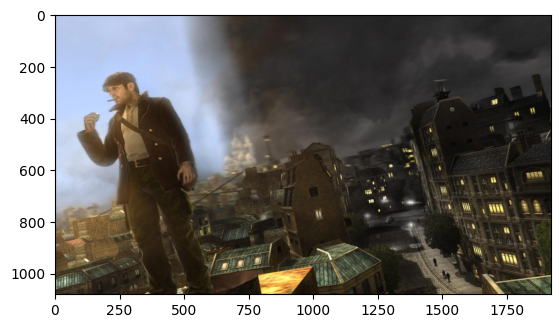

In [33]:
#Load the first image
imFirst = np.array(Image.open('/Users/niko/Desktop/Statistics and Data Science/10 Big Data Platforms(Advanced Analytics in Business)/Assignment2/images/24880_ss_3f90fcd02fc82643c7939cb608895a8c1c4cd168.1920x1080.jpg'))
imFirst = imFirst.astype('float32')
imFirst /= 255.0
imFirst = np.clip(imFirst, 0.0, 1.0)
plt.imshow(imFirst, cmap='gray')
plt.show()

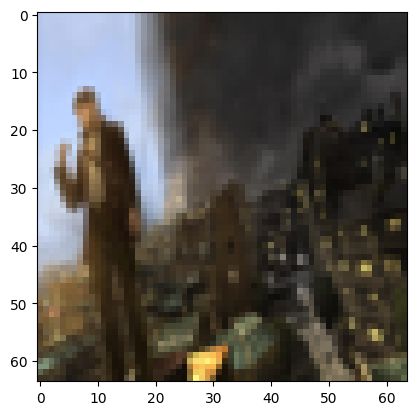

In [34]:
#Load the first image
imFirst = Image.open('/Users/niko/Desktop/Statistics and Data Science/10 Big Data Platforms(Advanced Analytics in Business)/Assignment2/images/24880_ss_3f90fcd02fc82643c7939cb608895a8c1c4cd168.1920x1080.jpg')
imFirst = imFirst.resize((64,64))
imFirst = np.array(imFirst)
imFirst = imFirst.astype('float32')
imFirst /= 255.0
imFirst = np.clip(imFirst, 0.0, 1.0)
plt.imshow(imFirst, cmap='gray')
plt.show()

Test the effect after processing black and white images, and use a small dataset to check the data after reading. Some images are recognized as black and white images, and the data dimensions are different from colored images. Processing is required before machine learning.

 14%|█▍        | 7/50 [00:00<00:01, 33.07it/s]

Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)


 22%|██▏       | 11/50 [00:00<00:01, 31.68it/s]

Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1006, 1920)


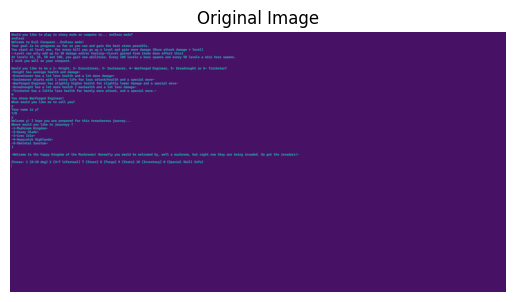

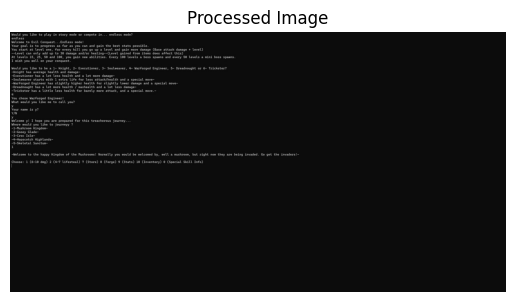

 32%|███▏      | 16/50 [00:00<00:02, 14.50it/s]

Image shape before processing: (1013, 1920, 3)
Image shape before processing: (1015, 1920)


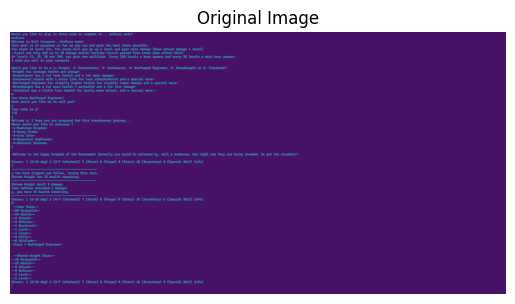

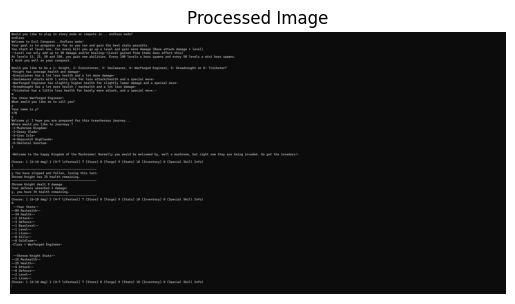

Image shape before processing: (1022, 1920)


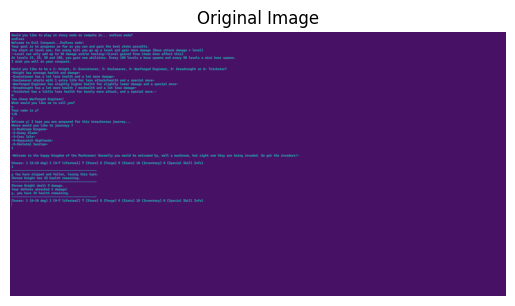

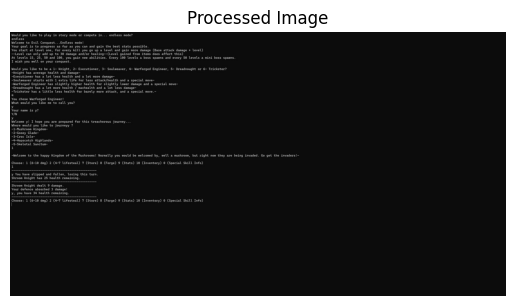

 42%|████▏     | 21/50 [00:01<00:02, 11.23it/s]

Image shape before processing: (902, 1920, 3)
Image shape before processing: (897, 1920, 3)
Image shape before processing: (902, 1920, 3)
Image shape before processing: (900, 1920, 3)
Image shape before processing: (1080, 1920, 3)


 58%|█████▊    | 29/50 [00:01<00:01, 18.84it/s]

Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)


 74%|███████▍  | 37/50 [00:02<00:00, 24.60it/s]

Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)


 94%|█████████▍| 47/50 [00:02<00:00, 31.61it/s]

Image shape before processing: (1080, 1920, 3)
Image shape before processing: (885, 1587, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)


100%|██████████| 50/50 [00:02<00:00, 21.30it/s]

Image shape before processing: (1080, 1920, 3)
Image shape before processing: (1080, 1920, 3)


In [50]:
"""
from tqdm import tqdm
from itertools import islice

# Set the path to the image folder
image_folder = '/Users/niko/Desktop/Statistics and Data Science/10 Big Data Platforms(Advanced Analytics in Business)/Assignment2/images'
nTrainImages = 50  # Set the number of images to process to the first 50

# Use tqdm to wrap the loop to show a progress bar
for index, row in tqdm(islice(rgrs_train.iterrows(), nTrainImages), total=nTrainImages):
    # Construct the image file path
    image_path = os.path.join(image_folder, row['train_images'])
    
    # Read and preprocess the image
    try:
        image = Image.open(image_path)
        print("Image shape before processing:", np.array(image).shape)  # Print the original image shape

        # Check the number of channels in the image, if not 3, convert to RGB color image
        if len(np.array(image).shape) == 2:  # If the image is grayscale (1 channel)
            plt.imshow(image, cmap='gray')
            plt.title('Original Image')
            plt.axis('off')
            plt.show()
            image = image.convert("RGB")  # Convert it to an RGB color image
            # Display the original image
            plt.imshow(image)
            plt.title('Processed Image')
            plt.axis('off')
            plt.show()
        # Resize, normalize, and preprocess the image
        image = image.resize((1920, 1080))  # Resize the image to the same dimensions
        processed_image = (np.array(image).astype('float32')) / 255  # Convert the image to a NumPy array
        processed_image = np.clip(processed_image, 0, 1.0)
        
        # Display the processed image

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
"""

### Set work directory to prepare for the machine learning data pipeline

In [16]:
current_dir = os.getcwd()
file_name = "images/"
file_path = os.path.join(current_dir, file_name)

#### Identify the Image with problem

In [18]:
"""
for screenshot in data_game_expand["screenshots"]:
    try:
        img = Image.open(file_path+screenshot)
    except PIL.UnidentifiedImageError:
        print(screenshot)
        print("Unidentified Image")
"""

'\nfor screenshot in data_game_expand["screenshots"]:\n    try:\n        img = Image.open(file_path+screenshot)\n    except PIL.UnidentifiedImageError:\n        print(screenshot)\n        print("Unidentified Image")\n'

In [19]:
drop_screenshots = ['2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.jpg',
                    '1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.jpg',
                    '1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.jpg']

for screenshot in drop_screenshots:
    data_game_expand=data_game_expand[data_game_expand['screenshots']!=screenshot]

len(data_game_expand['screenshots']) #128575 (128578-3)

128575

In [21]:
data_game_expand['price'] = pd.to_numeric(data_game_expand['price'])
data_game_expand['release']=pd.to_datetime(data_game_expand['release'])

## **<span style="color:green" >Modeling </span>**

In [22]:
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(gss.split(data_game_expand, groups=data_game_expand['appid']))
train_df = data_game_expand.iloc[train_idx]
test_df = data_game_expand.iloc[test_idx]

### log price

In [24]:
train_df['log_price'] = np.log1p(train_df['price'])  # np.log1p(x) equals np.log(1 + x)
test_df['log_price'] = np.log1p(test_df['price'])

/var/folders/bl/flyjs4c14zv14v64d_y74czm0000gn/T/ipykernel_22753/279751088.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bl/flyjs4c14zv14v64d_y74czm0000gn/T/ipykernel_22753/279751088.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode ='nearest'
)

#使用 flow_from_dataframe() 方法生成 generator
train_data = datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = file_path,
    x_col = 'screenshots',
    y_col = 'log_price',
    target_size = (128,128), #图像将被调整的尺寸
    batch_size = 32,
    class_mode = 'raw'
)

test_data = datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = file_path,
    x_col = 'screenshots',
    y_col = 'log_price',
    target_size = (128,128), #图像将被调整的尺寸
    batch_size = 32,
    class_mode = 'raw'
)

Found 102996 validated image filenames.
Found 25579 validated image filenames.


The rescale parameter is used in ImageDataGenerator to scale pixel values to the range [0, 1] when loading images. By default, pixel values range from [0, 255]. By setting rescale=1/255, you divide each pixel value by 255, thereby scaling it to the range [0, 1].

In [33]:
from sklearn.linear_model import LinearRegression
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate, Activation, Dropout, BatchNormalization, concatenate,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

BatchNormalization is a regularization technique used to accelerate and stabilize the training process of neural networks. It normalizes the data in each mini-batch, ensuring that the input data for each layer has a mean of 0 and a variance of 1. This helps to reduce internal covariate shift, improve training speed, and also acts as a form of regularization to some extent, thereby reducing overfitting.

### Model-1 traditional cnn

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# define model
model_1 = Sequential([
    # convo and pooling 
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten Layer and Dense Layer
    Flatten(),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),  
    Dense(1, activation='linear')
])

# comile model
model_1.compile(optimizer='adam', loss='mean_squared_error')  # 回归任务常用 MSE 作为损失函数

model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,561 (9.93 MB)

 Trainable params: 2,601,857 (9.93 MB)

 Non-trainable params: 704 (2.75 KB)

In [77]:
import tensorflow as tf
print("Is Eager mode: ", tf.executing_eagerly())

Is Eager mode:  True


### Randomly sample 1/10 of the training and testing data

Found 5150 validated image filenames.
Found 1279 validated image filenames.
Epoch 1/50


/Users/niko/miniconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



161/161 ━━━━━━━━━━━━━━━━━━━━ 82s 492ms/step - loss: 7.3383 - val_loss: 6.6963
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 78s 471ms/step - loss: 6.7803 - val_loss: 6.8852
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 476ms/step - loss: 6.9016 - val_loss: 6.7580
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 81s 485ms/step - loss: 6.7289 - val_loss: 7.3777
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 482ms/step - loss: 6.7852 - val_loss: 6.3035
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 479ms/step - loss: 6.4457 - val_loss: 6.2120
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 478ms/step - loss: 7.0454 - val_loss: 6.1014
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 477ms/step - loss: 6.6686 - val_loss: 6.3290
Epoch 9/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 477ms/step - loss: 6.6492 - val_loss: 6.5826
Epoch 10/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 479ms/step - loss: 6.8187 - val_loss: 6.3149
Epoch 11/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 481ms/step - loss: 6.6585 - val_loss: 6.2199
Epoch 12/50
161/161 ━━━━━━━━━━

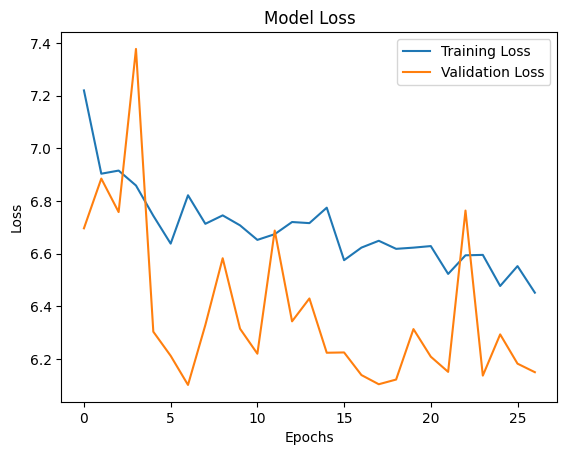

In [88]:
# Randomly sample 1/10 of the training and testing data
train_sampled_df = train_df.sample(frac=0.05, random_state=42)
test_sampled_df = test_df.sample(frac=0.05, random_state=42)

# Create data generators using the sampled data
train_data_sampled = datagen.flow_from_dataframe(
    dataframe=train_sampled_df,
    directory=file_path,
    x_col='screenshots',
    y_col='log_price',
    target_size=(64, 64),
    batch_size=32,
    class_mode='raw'
)

test_data_sampled = datagen.flow_from_dataframe(
    dataframe=test_sampled_df,
    directory=file_path,
    x_col='screenshots',
    y_col='log_price',
    target_size=(64, 64),
    batch_size=32,
    class_mode='raw'
)

# Pre-train the model using the sampled data
start_time = datetime.now()
history = model_1.fit(
    train_data_sampled,
    validation_data=test_data_sampled,
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)]
)

# Record the end time of training
end_time = datetime.now()

# Calculate the training time
training_time = end_time - start_time
print("Model training time:", training_time)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Resolution of image is 128*128

Found 5150 validated image filenames.
Found 1279 validated image filenames.
Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 575ms/step - loss: 58.8944 - val_loss: 6.8270
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 98s 587ms/step - loss: 9.2801 - val_loss: 6.3881
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 585ms/step - loss: 8.3327 - val_loss: 6.4463
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 104s 627ms/step - loss: 8.1272 - val_loss: 7.1652
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 116s 702ms/step - loss: 7.7027 - val_loss: 6.9897
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 107s 645ms/step - loss: 7.7316 - val_loss: 6.6272
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 108s 655ms/step - loss: 7.5649 - val_loss: 6.6377
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 108s 653ms/step - loss: 7.4126 - val_loss: 6.4486
Epoch 9/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 107s 647ms/step - loss: 7.2499 - val_loss: 6.3986
Epoch 10/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 108s 655ms/step - loss: 7.6164 - val_loss: 7.2265
Epoch 11/30
161/161 ━━━━━

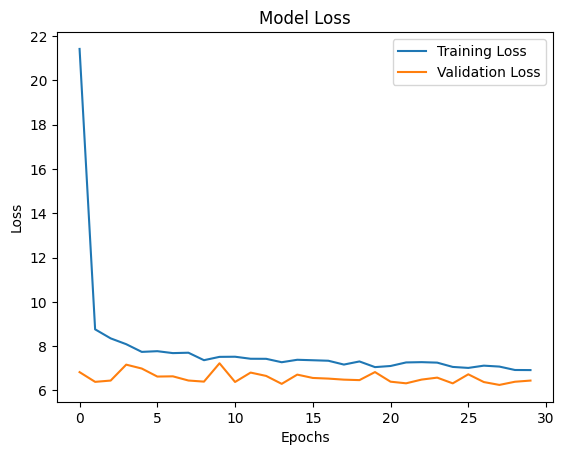

In [90]:
# Randomly sample 1/10 of the training and testing data
train_sampled_df = train_df.sample(frac=0.05, random_state=42)
test_sampled_df = test_df.sample(frac=0.05, random_state=42)

# Create data generators using the sampled data
train_data_sampled = datagen.flow_from_dataframe(
    dataframe=train_sampled_df,
    directory=file_path,
    x_col='screenshots',
    y_col='log_price',
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw'
)

test_data_sampled = datagen.flow_from_dataframe(
    dataframe=test_sampled_df,
    directory=file_path,
    x_col='screenshots',
    y_col='log_price',
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw'
)

# Pre-train the model using the sampled data
start_time = datetime.now()
history = model_1.fit(
    train_data_sampled,
    validation_data=test_data_sampled,
    epochs=30,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]
)

# Record the end time of training
end_time = datetime.now()

# Calculate the training time
training_time = end_time - start_time
print("Model training time:", training_time)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Import pre-trained model

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
# Load the pre-trained ResNet50 model, using it as a feature extractor
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False # Freeze the weights of the pre-trained model

model_2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),
    Dense(1, activation='linear')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_2.compile(optimizer='adam', loss='mean_squared_error')
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 103s 610ms/step - loss: 11.6233 - val_loss: 6.0683
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 110s 665ms/step - loss: 6.7183 - val_loss: 6.0617
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 124s 752ms/step - loss: 6.3395 - val_loss: 6.0712
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 122s 738ms/step - loss: 6.3478 - val_loss: 6.0752
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 122s 741ms/step - loss: 6.7581 - val_loss: 6.2267
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 132s 801ms/step - loss: 6.3284 - val_loss: 6.2139
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 131s 795ms/step - loss: 6.6295 - val_loss: 6.4214
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 132s 801ms/step - loss: 6.6232 - val_loss: 6.0447
Epoch 9/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 126s 764ms/step - loss: 6.4202 - val_loss: 6.3915
Epoch 10/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 127s 772ms/step - loss: 6.7102 - val_loss: 6.0708
Epoch 11/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 129s 782ms/step - loss: 6.4389 - val_loss: 6.1863
Epoch 1

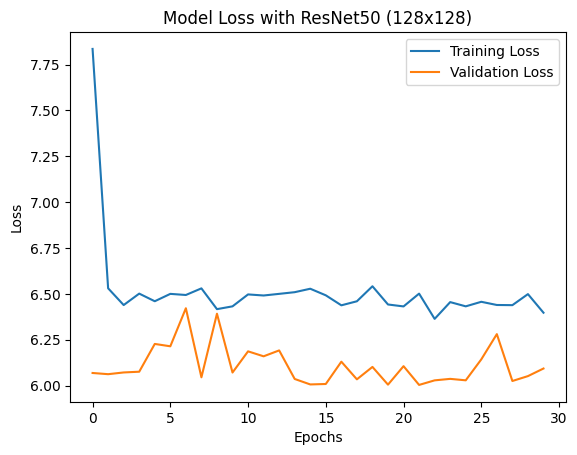

In [96]:
start_time = datetime.now()
history = model_2.fit(
    train_data_sampled,
    validation_data=test_data_sampled,
    epochs=30,
    callbacks=[early_stopping]
)
end_time=datetime.now()
# Record the training time
training_time = end_time - start_time
print("Model training time", training_time)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with ResNet50 (128x128)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 457ms/step


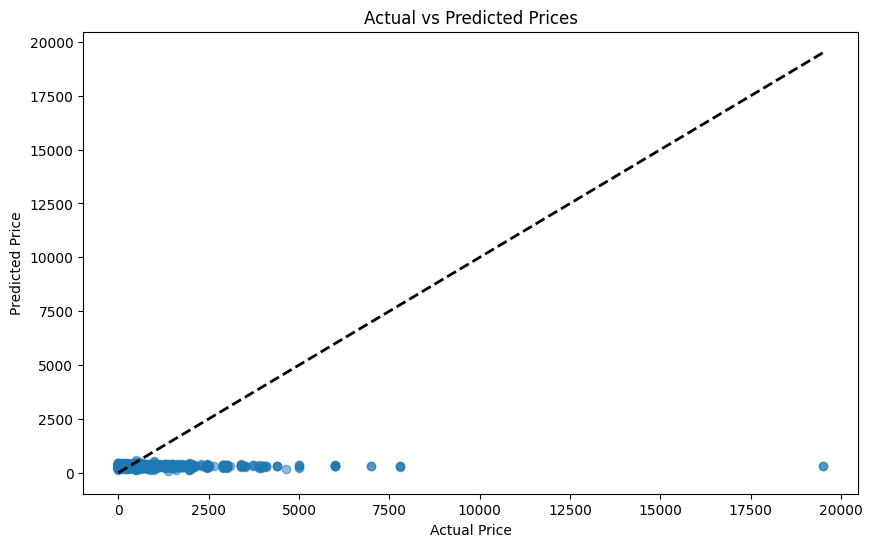

In [97]:
predictions_log = model_2.predict(test_data_sampled)

actuals_log = test_data_sampled.labels

actuals = np.expm1(actuals_log) 
predictions = np.expm1(predictions_log)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 458ms/step


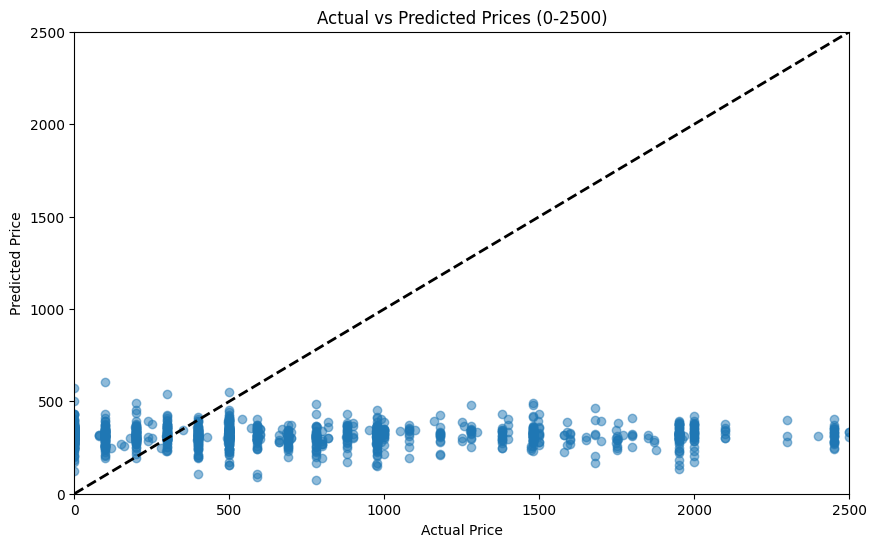

In [99]:
predictions_log = model_2.predict(test_data_sampled)

actuals_log = test_data_sampled.labels

actuals = np.expm1(actuals_log)
predictions = np.expm1(predictions_log)

mask = (actuals <= 2500) & (actuals >= 0)
filtered_actuals = actuals[mask]
filtered_predictions = predictions[mask]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_actuals, filtered_predictions, alpha=0.5)
plt.plot([0, 2500], [0, 2500], 'k--', lw=2) 
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (0-2500)')
plt.show()


## Training on full dataset

Epoch 1/5
3219/3219 ━━━━━━━━━━━━━━━━━━━━ 2828s 878ms/step - loss: 6.1065 - val_loss: 6.0046
Epoch 2/5
3219/3219 ━━━━━━━━━━━━━━━━━━━━ 2495s 774ms/step - loss: 6.1173 - val_loss: 5.9822
Epoch 3/5
3219/3219 ━━━━━━━━━━━━━━━━━━━━ 2338s 725ms/step - loss: 6.0511 - val_loss: 5.8964
Epoch 4/5
3219/3219 ━━━━━━━━━━━━━━━━━━━━ 2673s 830ms/step - loss: 6.0658 - val_loss: 5.8857
Epoch 5/5
3219/3219 ━━━━━━━━━━━━━━━━━━━━ 2579s 800ms/step - loss: 6.0384 - val_loss: 5.8976
Model training time 5:26:17.320345


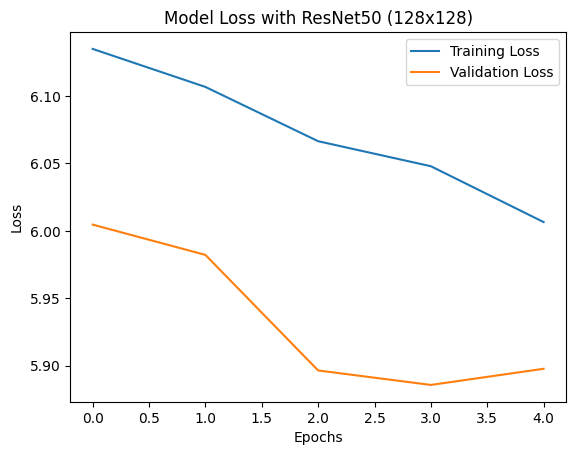

In [103]:
history = model_2.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=[early_stopping]
)

end_time=datetime.now()
# Record the training time
training_time = end_time - start_time
print("Model training time", training_time)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with ResNet50 (128x128)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Save complete model

In [46]:
model_2.save('my_model.keras')

/Users/niko/miniconda3/lib/python3.10/site-packages/keras/src/saving/saving_api.py:100: UserWarning:

You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.



In [42]:

# Save the model architecture to JSON
model_json = model_2.to_json()
with open("model_2_resnet50_1.json", "w") as json_file:
    json_file.write(model_json)



In [ ]:

# Save the model weights
model_2.save_weights("model_2_resnet50.weights.h5")


800/800 ━━━━━━━━━━━━━━━━━━━━ 446s 558ms/step


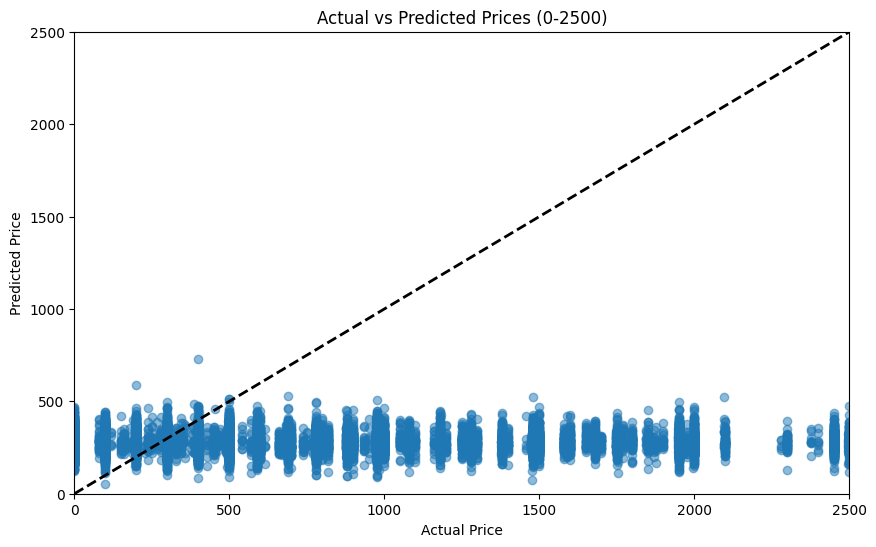

In [106]:
predictions_log = model_2.predict(test_data)

actuals_log = test_data.labels

actuals = np.expm1(actuals_log)
predictions = np.expm1(predictions_log)

mask = (actuals <= 2500) & (actuals >= 0)
filtered_actuals = actuals[mask]
filtered_predictions = predictions[mask]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_actuals, filtered_predictions, alpha=0.5)
plt.plot([0, 2500], [0, 2500], 'k--', lw=2)
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (0-2500)')
plt.show()


# Test omitting outliers

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GroupShuffleSplit

### Outlier

/var/folders/bl/flyjs4c14zv14v64d_y74czm0000gn/T/ipykernel_22753/975251445.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

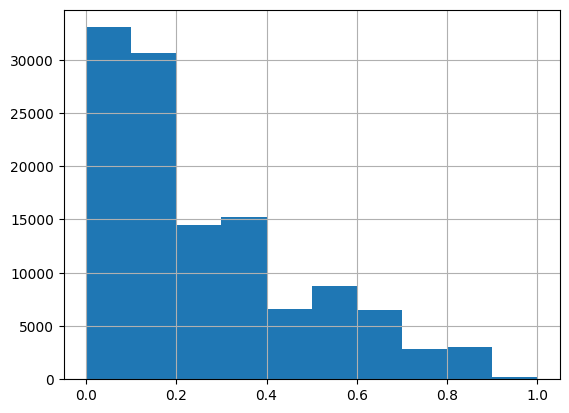

In [48]:
# Handle outliers using the IQR method
Q1 = data_game_expand['price'].quantile(0.25)
Q3 = data_game_expand['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
data_game_expand_cleaned = data_game_expand[~((data_game_expand['price'] < (Q1 - 1.5 * IQR)) | (data_game_expand['price'] > (Q3 + 1.5 * IQR)))]

# Data normalization
scaler = MinMaxScaler()
data_game_expand_cleaned['price'] = scaler.fit_transform(data_game_expand_cleaned[['price']])
data_game_expand_cleaned['price'].hist()

### Use cleaned data to gen training data

In [50]:
gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(gss.split(data_game_expand_cleaned, groups=data_game_expand_cleaned['appid']))

train_df = data_game_expand_cleaned.iloc[train_idx]
test_df = data_game_expand_cleaned.iloc[test_idx]

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96490 entries, 1 to 14686
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   appid            96490 non-null  object        
 1   release          96490 non-null  datetime64[ns]
 2   title            96490 non-null  object        
 3   price            96490 non-null  float64       
 4   sentiment        46879 non-null  object        
 5   reviews          46879 non-null  float64       
 6   percentage       46879 non-null  float64       
 7   tags             96490 non-null  object        
 8   screenshots      96490 non-null  object        
 9   num_screenshots  96490 non-null  int64         
 10  test_size        96490 non-null  int64         
 11  train_size       96490 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 9.6+ MB


In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode ='nearest'
)

train_data = datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = file_path,
    x_col = 'screenshots',
    y_col = 'price',
    target_size = (128,128),
    batch_size = 64,
    class_mode = 'raw'
)

test_data = datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = file_path,
    x_col = 'screenshots',
    y_col = 'price',
    target_size = (128,128),
    batch_size = 64,
    class_mode = 'raw'
)

Found 96490 validated image filenames.
Found 24909 validated image filenames.


# Resnet50

In [56]:
from tensorflow.keras.applications import ResNet50

input_tensor = Input(shape=(128, 128, 3))

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)
output_tensor = Dense(1, activation='linear')(x)

model_resnet = Model(inputs=input_tensor, outputs=output_tensor)

model_resnet.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_resnet.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_11[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/6


/Users/niko/miniconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



1508/1508 ━━━━━━━━━━━━━━━━━━━━ 2650s 2s/step - loss: 0.1000 - val_loss: 0.0534
Epoch 2/6
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 5472s 4s/step - loss: 0.0517 - val_loss: 0.0531
Epoch 3/6
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 2451s 2s/step - loss: 0.0512 - val_loss: 0.0535
Epoch 4/6
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 2480s 2s/step - loss: 0.0518 - val_loss: 0.0539
Epoch 5/6
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 3029s 2s/step - loss: 0.0511 - val_loss: 0.0535
Epoch 6/6
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 2875s 2s/step - loss: 0.0508 - val_loss: 0.0538


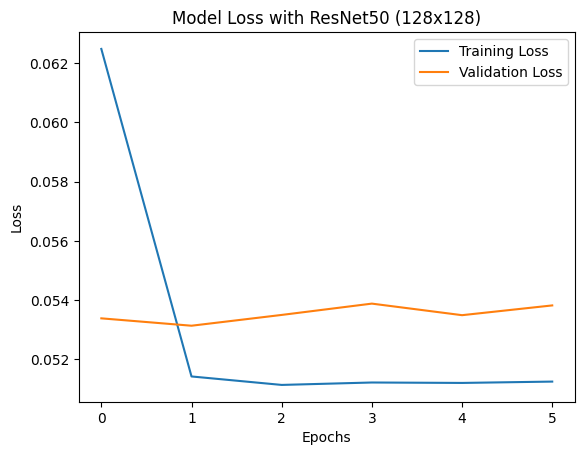

In [57]:
import matplotlib.pyplot as plt

# Initialize history object
history_resnet50 = {
    'loss': [],
    'val_loss': []
}

try:
    # Train the model with early stopping callback
    history_resnet = model_resnet.fit(
        train_data,
        validation_data=test_data,
        epochs=6,  # You can set a larger number of epochs to allow for manual interruption
        callbacks=[early_stopping]
    )
    # Update history object
    history_resnet50['loss'].extend(history_resnet.history['loss'])
    history_resnet50['val_loss'].extend(history_resnet.history['val_loss'])
except KeyboardInterrupt:
    print("Training was manually interrupted, preserving completed epoch data.")

# Plot training and validation loss
plt.plot(history_resnet50['loss'], label='Training Loss')
plt.plot(history_resnet50['val_loss'], label='Validation Loss')
plt.title('Model Loss with ResNet50 (128x128)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions_log = model_resnet.predict(test_data)
actuals_log = test_data.labels
plt.figure(figsize=(10, 6))
plt.scatter(actuals_log, predictions_log, alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

390/390 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step


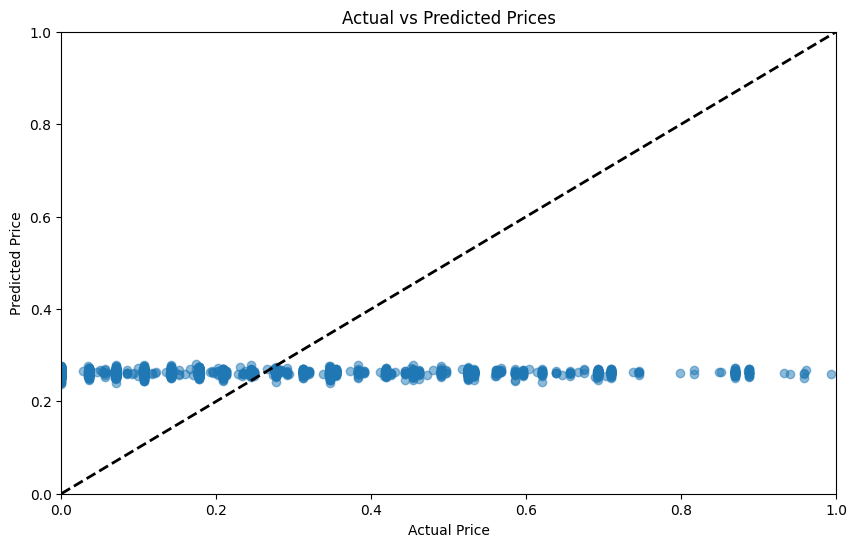

In [72]:
# Get predictions
predictions_log = model_resnet.predict(test_data)

# Get actual values and game IDs
actuals_log = test_data.labels
file_names = test_data.filenames  # Here, assume filenames contain the unique identifier appid

# Assume filename format is "appid_xxx.jpg", extract appid
game_ids = [fname.split('_')[0] for fname in file_names]

# Create DataFrame
df = pd.DataFrame({
    'game_appid': game_ids,
    'actual_price': actuals_log,
    'predicted_price': predictions_log.flatten()
})

# Aggregate data and calculate mean values
grouped_df = df.groupby('game_appid').mean().reset_index()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['actual_price'], grouped_df['predicted_price'], alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [59]:
model_resnet.save('model_resnet50.keras')

In [ ]:
model_resnet_loaded = load_model('model_resnet50.keras')
model_resnet_loaded.summary()

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model_1_cnn = Sequential([
    # Convolutional and pooling layers
    Input(shape=(128, 128, 3)),  # Matches target_size
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),  # Add BatchNormalization layer
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),  # Add BatchNormalization layer
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),  # Add BatchNormalization layer
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),  # Add BatchNormalization layer
    MaxPooling2D((2, 2)),

    # Flattening and fully connected layers
    Flatten(),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),  # Add Dropout layer to reduce overfitting
    Dense(1, activation='linear')  # For regression tasks
])

# Compile the model
model_1_cnn.compile(optimizer='adam', loss='mean_squared_error')  # MSE is commonly used as the loss function for regression tasks

# Print model summary
model_1_cnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,561 (9.93 MB)

 Trainable params: 2,601,857 (9.93 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/3


/Users/niko/miniconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



604/604 ━━━━━━━━━━━━━━━━━━━━ 414s 678ms/step - loss: 8.1196 - val_loss: 0.0597
Epoch 2/3
604/604 ━━━━━━━━━━━━━━━━━━━━ 491s 809ms/step - loss: 0.0589 - val_loss: 0.0570
Epoch 3/3
604/604 ━━━━━━━━━━━━━━━━━━━━ 502s 827ms/step - loss: 0.0552 - val_loss: 0.0550
156/156 ━━━━━━━━━━━━━━━━━━━━ 72s 460ms/step - loss: 0.0568
MSE on test data: 0.055049147456884384
156/156 ━━━━━━━━━━━━━━━━━━━━ 78s 500ms/step
     Actual  Predicted
0  0.000000   0.350560
1  0.000000   0.358776
2  0.461129   0.229504
3  0.106141   0.217942
4  0.141640   0.209015


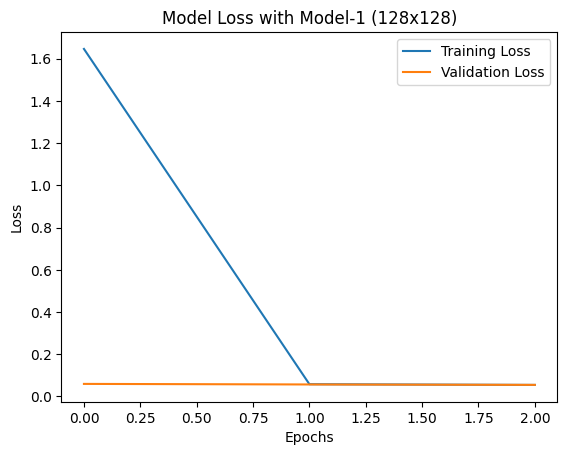

In [58]:
history = model_1.fit(
    train_data,
    validation_data=test_data,
    epochs=3
)

mse = model_1.evaluate(test_data)
print(f'MSE on test data: {mse}')

y_pred = model_1.predict(test_data)

result = pd.DataFrame({'Actual': test_sampled_df['price'].values, 'Predicted': y_pred.flatten()})
print(result.head())

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Model-1 (128x128)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
